# PANDAS

## Importing all necessary packages

In [149]:

import pandas as pd # data science essentials
import matplotlib.pyplot as plt # NEW: data visualization essentials
import seaborn as sns # NEW: enhanced data visualization

In [8]:
import pandas as pd

## Importing file 

file = "./__datasets/diamonds.xlsx"

diamonds = pd.read_excel(io = file, sheet_name = 0, header = 0)

diamonds.head(n = 5)

,Obs,carat,color,clarity,cut,channel,store,price
0,1,0.32,3,7,0,0,7,1375
1,2,0.35,5,7,1,0,7,1680
2,3,0.40,4,7,1,0,7,2245
3,4,0.59,5,7,0,0,3,2495
4,5,0.72,7,8,0,0,8,2699


# Slicing through the data set 

In [10]:
diamonds['carat'].head( n = 5)

0    0.32
1    0.35
2    0.40
3    0.59
4    0.72
Name: carat, dtype: float64

In [19]:
diamonds[    ['carat']    ].head(n = 5)

,carat
0,0.32
1,0.35
2,0.40
3,0.59
4,0.72


In [21]:
diamonds[    ['carat', 'color', 'clarity', 'cut']    ].head( n  = 5)

,carat,color,clarity,cut
0,0.32,3,7,0
1,0.35,5,7,1
2,0.40,4,7,1
3,0.59,5,7,0
4,0.72,7,8,0


## iloc and loc method for slicing 

The'.iloc' is used for entering the row and coloumn numbers. 
whereas, the '.loc' method is used to enter the row number and the variable name. 
NB only one variable name can be put inside a square bracket

In [38]:
diamonds.loc[ 3:10 , 'carat']


3     0.59
4     0.72
5     0.72
6     0.51
7     1.00
8     1.00
9     0.47
10    0.75
Name: carat, dtype: float64

In [45]:
diamonds.iloc[3 : 10, 1:3 ]
diamonds.iloc[10:100, 1: ]


,carat,color,clarity,cut,channel,store,price
10,0.75,5,8,0,0,3,3200
11,0.72,5,7,1,0,8,3499
12,0.72,6,7,0,0,4,3499
13,0.70,6,6,0,0,3,3500
14,1.03,6,8,0,0,3,3900
...,...,...,...,...,...,...,...
95,0.40,6,4,1,2,10,949
96,0.38,4,5,1,2,10,986
97,0.36,4,4,1,2,10,998
98,0.38,5,4,1,2,10,1025


## Conditional Slicing 

print out all variables whose carat value is greater than 2 

In [49]:

diamonds.loc[ : , 'carat'][diamonds.loc[ :, 'carat'] > 2]

39     2.37
42     2.11
90     2.04
354    2.27
368    2.02
377    2.10
378    2.13
379    2.20
382    2.01
390    2.01
391    2.01
392    2.02
397    2.48
398    2.01
Name: carat, dtype: float64

Practice 1 

print out all diamonds with price less than 3000

In [52]:
diamonds.loc[ : , 'price'][diamonds.loc[ : , 'price'] < 3000]

0      1375
1      1680
2      2245
3      2495
4      2699
       ... 
146    2665
147    2678
148    2680
149    2680
150    2905
Name: price, Length: 74, dtype: int64

## Slicing multiple variables at a time 

Practice 2 

multiple variables 

print out diamonds with carrat > 2, clarity and cut = 1 and price less than 3000

In [64]:
diamonds.loc[ : , ['carat', 'clarity', 'cut', 'price'] ]\
            [diamonds.loc[ : , 'carat']    < 2]\
            [diamonds.loc[ : , 'clarity'] == 1]\
            [diamonds.loc[ : , 'cut'] == 1]\
            [diamonds.loc[ : , 'price'] < 10000]
    
  

C:\Users\chaud\AppData\Local\Temp/ipykernel_27160/362985114.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  diamonds.loc[ : , ['carat', 'clarity', 'cut', 'price'] ]\


,carat,clarity,cut,price
92,0.35,1,1,893
298,1.04,1,1,7150
318,1.17,1,1,8089
319,1.17,1,1,8089


## A more cleaner approach to slice multiple variables 

In [67]:
data = diamonds.loc[ : , [ 'carat', 'clarity', 'cut', 'price']]

carat_condition = diamonds.loc[ : , 'carat'] < 2
clarity_condition  = diamonds.loc[ : , 'clarity'] == 1
cut_condition  = diamonds.loc[ : , 'cut'] == 1
price_condition= diamonds.loc[ : , 'price'] < 5000

data[carat_condition][clarity_condition][cut_condition][price_condition]



C:\Users\chaud\AppData\Local\Temp/ipykernel_27160/3477955103.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[carat_condition][clarity_condition][cut_condition][price_condition]


,carat,clarity,cut,price
92,0.35,1,1,893


# Auditing Data Quality and fixing features 

Auditing the data quality is the first step while working with data sets. 
There are three important data frame methods, .info(), .describe() and .value_counts()

Link : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html

## ".info' method in dataframe

".info()" gives details like variable type , no of variables, no of obs, memory usage 

In [78]:
diamonds.info()

"""
______________________________________________________________________________________________________________________

Note: All variables here are integer or float. However, store; channel; 
obs and cut (ideally) are suppose to be characters.
The variable cut has a yes or no observation, it can be categorized as character
But, for future work its ideal to keep it in binary for, i.e 1 and 0.


______________________________________________________________________________________________________________________

"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Obs      409 non-null    object 
 1   carat    409 non-null    float64
 2   color    409 non-null    int64  
 3   clarity  409 non-null    int64  
 4   cut      409 non-null    int64  
 5   channel  409 non-null    object 
 6   store    409 non-null    object 
 7   price    409 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 25.7+ KB


'\n______________________________________________________________________________________________________________________\n\nNote: All variables here are integer or float. However, store; channel; \nobs and cut (ideally) are suppose to be characters.\nThe variable cut has a yes or no observation, it can be categorized as character\nBut, for future work its ideal to keep it in binary for, i.e 1 and 0.\n\n\n______________________________________________________________________________________________________________________\n\n'

## Changing variable types 

___________________________________________________________________________________________________________________________
Inorder to change variable types in pandas, we can use dictionaries.
The following method can be used:

{"feature" : data type,     # feature 1
 "feature" : data type,     # feature 2
 ...}  
 
 once, a dictionary is created,  import the diamonds dataset one more time, reading in the data types using the dtypes = data_type argument from pd.read_excel( ).
 __________________________________________________________________________________________________________________________

In [76]:
data_types = {'Obs': str,
'store' : str,
'channel' : str}

diamonds = pd.read_excel(io = file,
                        sheet_name = 'diamonds',
                        header = 0,
                        dtype = data_types)
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Obs      409 non-null    object 
 1   carat    409 non-null    float64
 2   color    409 non-null    int64  
 3   clarity  409 non-null    int64  
 4   cut      409 non-null    int64  
 5   channel  409 non-null    object 
 6   store    409 non-null    object 
 7   price    409 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 25.7+ KB


___________________________________________________________________________________________________________________________
Note that Python interpreted our string conversions as type object. 
This is normal, and stems from the fact that strings are the most fundamental of data types in Python.
When Python is confused about a feature's data type, such as when a string conversion takes place, 
it defaults to the type object. This is because strings can represent virtually anything.
___________________________________________________________________________________________________________________________

## Descriptive Statistic using '.describe()'

_________________________________________________________________________________________________________________
'.describe()' is used to return the descriptive statistics of all variables which are either integer or floats.
But, when the descriptive statistics is printed, most times it will be upto 4 or 5 decimal places 
thus, use '.round()' method to remove decimal places.
__________________________________________________________________________________________________________________

In [80]:
diamonds.describe()


,carat,color,clarity,cut,price
count,409.000000,409.000000,409.000000,409.000000,409.000000
mean,1.055968,4.227384,5.056235,0.376528,6488.229829
std,0.418013,1.810815,1.573141,0.485108,4414.425161
min,0.320000,1.000000,1.000000,0.000000,878.000000
25%,0.720000,3.000000,4.000000,0.000000,3490.000000
50%,1.020000,4.000000,5.000000,0.000000,5550.000000
75%,1.210000,6.000000,6.000000,1.000000,8089.000000
max,2.480000,9.000000,9.000000,1.000000,27575.000000


In [82]:
diamonds.describe().round(2)
## diamonds.describe(include = 'number').round(decimals = 2)

,carat,color,clarity,cut,price
count,409.00,409.00,409.00,409.00,409.00
mean,1.06,4.23,5.06,0.38,6488.23
std,0.42,1.81,1.57,0.49,4414.43
min,0.32,1.00,1.00,0.00,878.00
25%,0.72,3.00,4.00,0.00,3490.00
50%,1.02,4.00,5.00,0.00,5550.00
75%,1.21,6.00,6.00,1.00,8089.00
max,2.48,9.00,9.00,1.00,27575.00


____________________________________________________________________________________________________________

the ".describe()" has an argument called as 'include'.
this helps to set the data type of the variables, for which we want to see summary
we can use number, for integers and floats. where as for strings we can use object.
However, this argument doesnot give much information about abjects.

_____________________________________________________________________________________________________________

In [86]:
diamonds.describe(include = 'object')

,Obs,channel,store
count,409,409,409
unique,409,3,11
top,1,2,10
freq,1,318,211


## 'value_counts' method 

_______________________________________________________________________________________________________________________
This gives us very limited information, like unique observations, frequency. but no anaysis can be drawn from the above.
Thus, value_counts() is used to do further analysis for dtypes = objects aswell as for some numbers.

diamonds[variablename].value_counts(normalize = False,
                                 sort      = False,
                                 ascending = False)


NOTE ABOUT THE DOT BEFORE THE ARGUMENT


    
normalize bool ------- default False
Return proportions rather than frequencies.

sort ---------  bool, default True
.

ascending -------------- bool, default False  Sort in ascending order.
________________________________________________________________________________________________________________________

Normalize returns the proportions 

In [119]:
diamonds[    ['store']    ].value_counts(normalize = True, sort = True, ascending = False)

store
10       0.515892
11       0.261614
3        0.036675
7        0.034230
6        0.031785
1        0.026895
9        0.022005
2        0.019560
4        0.017115
5        0.017115
8        0.017115
dtype: float64

In [98]:
diamonds['channel'].value_counts(normalize = True, sort = True, ascending = False)

2    0.777506
1    0.117359
0    0.105134
Name: channel, dtype: float64

### Applying value_counts to integer variables 

In [101]:
diamonds['clarity'].value_counts(normalize = True, sort = False, ascending = False).round(3)

7    0.159
8    0.032
9    0.005
6    0.203
5    0.259
4    0.186
3    0.103
2    0.027
1    0.027
Name: clarity, dtype: float64

# Working with missing values and method chaining 

For working with missing values we first need to import a fresh file called diamonds missing value 

In [105]:
file1 = "./__datasets/diamonds_missing_values.xlsx"

diamonds_missing = pd.read_excel(io = file1, sheet_name = 'missing_diamonds', header = 0)
diamonds_missing

,Obs,carat,color,clarity,cut,channel,store,price
0,1,0.32,3.0,7.0,0.0,0,7,1375
1,2,0.35,5.0,7.0,1.0,0,7,1680
2,3,0.40,4.0,7.0,1.0,0,7,2245
3,4,0.59,5.0,7.0,0.0,0,3,2495
4,5,0.72,7.0,8.0,0.0,0,8,2699
...,...,...,...,...,...,...,...,...
404,421,2.00,3.0,4.0,0.0,2,10,21933
405,422,2.00,2.0,5.0,1.0,2,10,22431
406,423,2.00,3.0,4.0,0.0,2,10,22706
407,424,2.00,2.0,3.0,0.0,2,10,26623


After importing the data set, 
we need to check info, describe and change the data type, 
these are the first steps of cleaning data.

In [112]:
diamonds_missing.info()

## Changing store, channel, obs to objects as they are not categorized under the right variable type

## Use dictionary to first create an object 

data_conv = {'Obs': str, 'store' : str, 'channel'  : str}

## Now, import the data set again and set dtype = data_conv

diamonds_missing = pd.read_excel(io = file1, sheet_name = 'missing_diamonds', header = 0, dtype = data_conv)
diamonds_missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Obs      409 non-null    object 
 1   carat    400 non-null    float64
 2   color    396 non-null    float64
 3   clarity  402 non-null    float64
 4   cut      399 non-null    float64
 5   channel  409 non-null    object 
 6   store    409 non-null    object 
 7   price    409 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 25.7+ KB


,Obs,carat,color,clarity,cut,channel,store,price
0,1,0.32,3.0,7.0,0.0,0,7,1375
1,2,0.35,5.0,7.0,1.0,0,7,1680
2,3,0.40,4.0,7.0,1.0,0,7,2245
3,4,0.59,5.0,7.0,0.0,0,3,2495
4,5,0.72,7.0,8.0,0.0,0,8,2699
...,...,...,...,...,...,...,...,...
404,421,2.00,3.0,4.0,0.0,2,10,21933
405,422,2.00,2.0,5.0,1.0,2,10,22431
406,423,2.00,3.0,4.0,0.0,2,10,22706
407,424,2.00,2.0,3.0,0.0,2,10,26623


Imputed value is an important concept in data analysis, its an estimated assumed value for data points which are missing. this is one of the technique of dealing with missing values. 

ways to deal with missing values:

1. Remove the observations which have missing values 
2. Engineering flag features 
3. Imputed value, say for instance replace the missing value with the mean  
4. Develop an algorithm based on the available information



## Dropping missing values 

variables can be dropped by slicing technique.

However, its a very bad strategy and must be the resort. 

## Method chaining 

It is a very useful technique for missing value detection. 
We can also benefit from visualizing the distributions of features affected by missing values with the matplotlib and seaborn packages. 
All method chaining arguments are preceded with a dot.

There are three steps in method chaining:

Step 1: print the data set
                print(dataset)

Step 2: check for any null values
                print(dataset.isnull())

Step 3: Taking the results of isnull( ), and then aggregating column-wise with any( ) to see which features are affected by missing values.

                print(dataset.isnull().any(axis = 0))
                

This will returns True or False, depending on whether or not a feature contains missing values.

In [123]:
print(diamonds_missing.isnull().any(axis = 0))

Obs        False
carat       True
color       True
clarity     True
cut         True
channel    False
store      False
price      False
m_carat    False
dtype: bool


Here color, clarity and cut has missing values

While, dealing with missing values, it is important that we check what percentage of the data has missing values.

if the missing values is less than 5%, we can drop or replace them with mean. 

## Flagging missing values

In this method we will form a new column, for the variable with missing values. Each observation will have 1 or 0. 
where 1 are observations with missing values.

Practice - Develop a method chain that:

Takes the carat column

Checks each data point for missing values (True or False)

Converts the True/False data to integers.

here, '.astype(int)' will assign 0 or 1 to the variable. Also we are renaming the variable as m_variable (m standing for missing value)

In [129]:
diamonds_missing['m_carat'] = diamonds.loc[ : , 'carat'].isnull().astype(int)

print(diamonds_missing)

diamonds_missing.columns

     Obs  carat  color  clarity  cut channel store  price  m_carat
0      1   0.32    3.0      7.0  0.0       0     7   1375        0
1      2   0.35    5.0      7.0  1.0       0     7   1680        0
2      3   0.40    4.0      7.0  1.0       0     7   2245        0
3      4   0.59    5.0      7.0  0.0       0     3   2495        0
4      5   0.72    7.0      8.0  0.0       0     8   2699        0
..   ...    ...    ...      ...  ...     ...   ...    ...      ...
404  421   2.00    3.0      4.0  0.0       2    10  21933        0
405  422   2.00    2.0      5.0  1.0       2    10  22431        0
406  423   2.00    3.0      4.0  0.0       2    10  22706        0
407  424   2.00    2.0      3.0  0.0       2    10  26623        0
408  425   2.00    1.0      4.0  0.0       2    10  27575        0

[409 rows x 9 columns]


Index(['Obs', 'carat', 'color', 'clarity', 'cut', 'channel', 'store', 'price',
       'm_carat'],
      dtype='object')


## For loop for flagging and creating  columns for all variables with      missing values


-----------------------------------------------------------------------------------------

In [146]:
DATAFRAME = diamonds_missing


# developing a loop to automatically flag missing values
for col in diamonds_missing:

    if DATAFRAME[col].isnull().astype(int).sum() > 0:
        DATAFRAME['m_'+col] = DATAFRAME[col].isnull().astype(int)


# printing results
print(diamonds_missing.columns)
print(diamonds_missing)

Index(['Obs', 'carat', 'color', 'clarity', 'cut', 'channel', 'store', 'price',
       'm_carat', 'm_color', 'm_clarity', 'm_cut', 'mv_sum'],
      dtype='object')
     Obs  carat  color  clarity  cut channel store  price  m_carat  m_color  \
0      1   0.32    3.0      7.0  0.0       0     7   1375        0        0   
1      2   0.35    5.0      7.0  1.0       0     7   1680        0        0   
2      3   0.40    4.0      7.0  1.0       0     7   2245        0        0   
3      4   0.59    5.0      7.0  0.0       0     3   2495        0        0   
4      5   0.72    7.0      8.0  0.0       0     8   2699        0        0   
..   ...    ...    ...      ...  ...     ...   ...    ...      ...      ...   
404  421   2.00    3.0      4.0  0.0       2    10  21933        0        0   
405  422   2.00    2.0      5.0  1.0       2    10  22431        0        0   
406  423   2.00    3.0      4.0  0.0       2    10  22706        0        0   
407  424   2.00    2.0      3.0  0.0       2   

## How many missing values are there for each variable
## Creating a new column of sum of missing values 

In [147]:
print(f"""
Original Missing Value Counts:
------------------------------
{diamonds_missing.isnull().sum(axis = 0)}


Sums of Missing Value Flags
--------------------------
{diamonds_missing.iloc[ : , -4: ].sum(axis = 0)}

""")


# creating a column to sum missing value flags
diamonds_missing['mv_sum'] = diamonds_missing['m_carat'] + \
                     diamonds_missing['m_color'] + \
                     diamonds_missing['m_clarity'] + \
                     diamonds_missing['m_cut']


# checking results
print(f"""

Number of Missing Values per Observation (Pct)
----------------------------------------------
{(diamonds_missing['mv_sum'].value_counts(normalize = True,
                                sort = True,
                                ascending = True)*100).round(2)}
""")
print(diamonds_missing)


Original Missing Value Counts:
------------------------------
Obs           0
carat         9
color        13
clarity       7
cut          10
channel       0
store         0
price         0
m_carat       0
m_color       0
m_clarity     0
m_cut         0
mv_sum        0
dtype: int64


Sums of Missing Value Flags
--------------------------
m_color      13
m_clarity     7
m_cut        10
mv_sum       39
dtype: int64




Number of Missing Values per Observation (Pct)
----------------------------------------------
2     0.24
1     9.05
0    90.71
Name: mv_sum, dtype: float64

     Obs  carat  color  clarity  cut channel store  price  m_carat  m_color  \
0      1   0.32    3.0      7.0  0.0       0     7   1375        0        0   
1      2   0.35    5.0      7.0  1.0       0     7   1680        0        0   
2      3   0.40    4.0      7.0  1.0       0     7   2245        0        0   
3      4   0.59    5.0      7.0  0.0       0     3   2495        0        0   
4      5   0.72    7.0    

### Difference between any(axis = 0), astype(int), sum(axis = 0) , sum()

 any(axis = 0) is used to return True or False for variables having missing values
 
 astype(int) is used to add a new column at the end with 1 and 0, where 1 represents missing value.
 
 sum(axis = 0) will return the sum of missing values for a given variable 
 
 

## Imputing Missing Values 

Step 1: Make a copy of the dataset by using pd.DataFrame.copy

Step 2: Drop the missing values by using .dropna()

Step 3: check to see if all missing values have been dropped by using .isnull().sum()

Step 4: Visualize the data using matplotlib.pyplot and seaborn 

Step 5: Analyze the mean and median and decide which one to use 

Step 6: Calculate the mean or the median 

Step 7: Fill missing values with either mean or median using fillna()

### Making a copy of the data set 

In [150]:
df_dropped = pd.DataFrame.copy(diamonds_missing)

### Dropping missing values

In [152]:
df_dropped = df_dropped.dropna()

### Checking to see if all missing values have been dropped 

In [154]:
df_dropped.isnull().sum()

Obs          0
carat        0
color        0
clarity      0
cut          0
channel      0
store        0
price        0
m_carat      0
m_color      0
m_clarity    0
m_cut        0
mv_sum       0
dtype: int64

###  Visualizing the dataset with dropped missing values 



seaborn.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat=’count’, bins=’auto’, binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple=’layer’, element=’bars’, fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, kwargs)**

Parameters Information

1. data : pandas.DataFrame, numpy.ndarray, mapping, or sequence – Here we provide the input data for the visualization

2. x, y : vectors or keys in data – Through this parameter, we mention the x and y axes positions.

3. hue : vector or key in data – This parameter helps in mapping of variables to color for plot.

4. weights : vector or key in data – Weights help in understanding the impact of each data point for each bin’s count.

5. stat : {“count”, “frequency”, “density”, “probability”} – These are the four types of statistic method that can be used for computing bin values.

6. bins : str , number, vector, or a pair of such values – It’s the bin parameter used for specifying the number of bins.

7. binwidth : umber or pair of numbers – Here we can set the width of the bin

8. binrange : pair of numbers or a pair of pairs – Through this parameter, the lowest and highest value can be specified for edges.

9. palette: string, list, dict, or matplotlib.colors.Colormap – We can choose the colors for mapping hue semantic.

10. color : matplotlib color – This parameter enables us to choose a single color in case there is no hue mapping.

11. kwargs – These are the keyword arguments

https://machinelearningknowledge.ai/seaborn-histogram-plot-using-histplot-tutorial-for-beginners/#Syntax_of_Histogram_Function_in_Seaborn

#### Plotting the graph 

<AxesSubplot:xlabel='carat', ylabel='Count'>

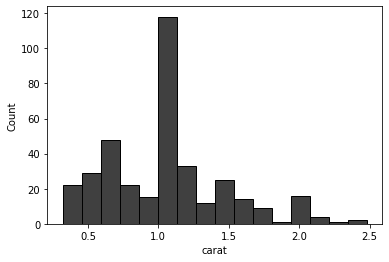

In [161]:
sns.histplot(data = df_dropped, x = 'carat', bins = 'fd', kde = False, color = 'black')

#### Adding title and labels 

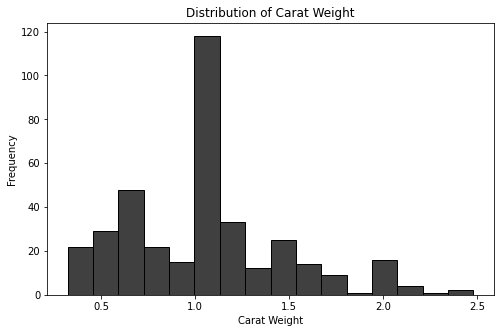

In [171]:
fig, ax = plt.subplots(figsize = [8, 5])

sns.histplot(data = df_dropped, x = 'carat', bins = 'fd', kde = False, color = 'black')
plt.title(label = "Distribution of Carat Weight")
plt.xlabel(xlabel = "Carat Weight")
plt.ylabel(ylabel = "Frequency")

plt.show()

#### Analyzing the graph with mean and median 

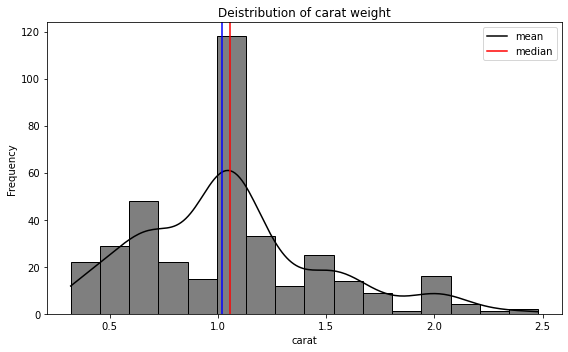

In [195]:
fig, ax = plt.subplots(figsize = [8,5])

sns.histplot(data = df_dropped, x = 'carat', kde = True, bins = 'fd', color = 'black')

plt.title(label = "Deistribution of carat weight")
plt.xlabel(xlabel = "carat")
plt.ylabel(ylabel = "Frequency")

## Adding vertical lines for mean and median 

plt.axvline(x = df_dropped['carat'].mean(), color = 'red')
plt.axvline(x = df_dropped['carat'].median(), color = 'blue')

plt.legend(labels = ['mean', 'median'])

plt.tight_layout()
plt.show()


### Choosing mean or median 

1. Check for skewness in the data 

2. If the graph is skewed that means the data has outliers.

3. Outliers impact mean, thus it is ideal to use median 

4. For normal distribution or symetric distribution, we can use the mean to impute values.


### Calculating median and replacing it with fillna()

While replacing the na values we will use the original file, which is diamonds_missing 

In [188]:
carat_median  = diamonds_missing['carat'].median()

carat_median

1.02

In [193]:
diamonds_missing['carat'].fillna(value = carat_median, inplace = True)



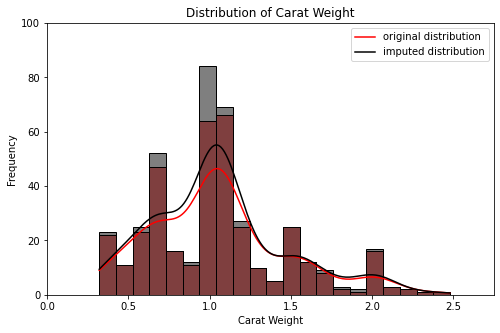

In [194]:
fig, ax = plt.subplots(figsize = [8, 5],
                       sharex = True, # sharing x-axis between visualizations
                       sharey = True) # sharing y-axis between visualizations


# histogram for carat
sns.histplot(data  = df_dropped,
             x     = 'carat',
             bins  = 21,
             kde   = True, # drawing theoretical distribution
             color = 'red')


# histogram for carat
sns.histplot(data  = diamonds_missing,
             x     = 'carat',
             bins  = 21,
             kde   = True, # drawing theoretical distribution
             color = 'black')


# titles, labels, and formatting
plt.title(label   = "Distribution of Carat Weight")
plt.xlabel(xlabel = 'Carat Weight')
plt.ylabel(ylabel = 'Frequency')
plt.xlim(0.0, 2.75) # setting x-axis range
plt.ylim(0.0, 100) # setting y-axis range


# this adds a legend
plt.legend(labels =  ['original distribution',
                      'imputed distribution'])